<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_006_variance_tests_levene_%26_f_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tests for Equality of Variances
---
### **1. Variance Analysis**
- **Levene’s Test**: Tests for equality of variances between groups. Useful as a precursor to t-tests or ANOVA.
- **F-Test**: Compares variances of two groups to test if they are significantly different.

---

### **2. Tests for Multiple Groups**
- **One-Way ANOVA**: Tests whether the means of three or more independent groups are equal.
  - Follow-up: Post-hoc tests like Tukey’s HSD to identify which groups differ.
- **Kruskal-Wallis Test**: Non-parametric alternative to one-way ANOVA for data not meeting normality assumptions.

### **Comparison of Levene’s Test and F-Test**

#### **1. Purpose**
- **Levene’s Test**: Tests for equality of variances across two or more groups. It is more general and can handle more than two groups.
- **F-Test**: Specifically compares the variances of **two groups only** to determine if they are significantly different.

---

#### **2. Assumptions**
- **Levene’s Test**:
  - Does not assume that the data is normally distributed, making it more robust to deviations from normality.
  - Works well for both small and large sample sizes.
- **F-Test**:
  - Assumes that the data in each group is normally distributed.
  - Can be sensitive to deviations from normality, especially with smaller sample sizes.

---

#### **3. Use Cases**
- **Levene’s Test**:
  - Appropriate when comparing **more than two groups** (e.g., variances of `sepal length` for `setosa`, `versicolor`, and `virginica`).
  - Used as a precursor to ANOVA to ensure equal variances.
- **F-Test**:
  - Best for comparing **exactly two groups** (e.g., variance of `sepal length` for `setosa` vs. `versicolor`).
  - Used when variances need to be evaluated directly between two groups.

---

#### **4. Statistical Outputs**
- Both tests produce:
  - A **test statistic**: Quantifies the ratio of variances or deviations.
  - A **p-value**: Indicates whether to reject the null hypothesis of equal variances.

---

#### **5. Robustness**
- **Levene’s Test**:
  - More robust to non-normal data and outliers because it uses a transformation based on the absolute deviations from the group means or medians.
- **F-Test**:
  - Less robust, highly sensitive to non-normality and outliers, potentially leading to misleading results if assumptions are violated.

---

### **Key Takeaways**
- Use **Levene’s Test** when comparing variances across multiple groups or when normality assumptions are questionable.
- Use the **F-Test** when comparing variances between two groups, especially if you are confident in the normality of the data.



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})
# iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Levene's Test for Equality of Variances

### **Question**  
Do the variances of `sepal length` differ significantly between `setosa`, `versicolor`, and `virginica`?

---

### **Levene's Test for Equality of Variances**  
- **Null Hypothesis (\(H_0\))**: The variances of `sepal length` are equal across `setosa`, `versicolor`, and `virginica`.  
- **Alternative Hypothesis (\(H_1\))**: At least one group's variance is different from the others.  

---

### **Analysis and Interpretation**  
- The boxplot shows variability in the spread of `sepal length` across the three species.  
- The test statistic (\(6.35\)) indicates a noticeable difference in variance.  
- The p-value (\(0.0023\)) is below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that the variances of `sepal length` differ significantly between the three species.  



Levene's Test for Equality of Variances:
Test Statistic: 6.35
P-Value: 0.0023
Conclusion: Reject the null hypothesis. Variances differ significantly between groups.




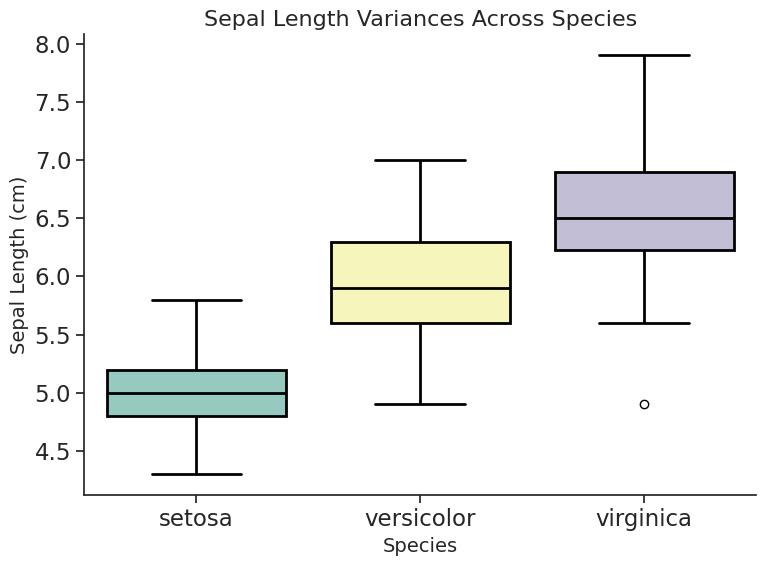

In [ ]:
from scipy.stats import levene

# Set Seaborn theme, style, and palette
sns.set_theme(style="ticks", palette="Set3")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Extract sepal length data for each species
setosa_sepal_length = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_sepal_length = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
virginica_sepal_length = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

# Perform Levene's Test
stat, p_value = levene(setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length)

# Output results
print("Levene's Test for Equality of Variances:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. Variances differ significantly between groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in variances between groups.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df, x='species', y='sepal length (cm)', hue='species',linewidth=2, linecolor='k')
plt.title("Sepal Length Variances Across Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Sepal Length (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


### F-Test for Equality of Variances

### **Question**  
Do the variances of `sepal length` differ significantly between `setosa` and `versicolor`?

---

### **F-Test for Equality of Variances**  
- **Null Hypothesis (\(H_0\))**: The variances of `sepal length` for `setosa` and `versicolor` are equal.  
- **Alternative Hypothesis (\(H_1\))**: The variances of `sepal length` for `setosa` and `versicolor` are not equal.  

---

### **Analysis and Interpretation**  
- The boxplot shows the variability in `sepal length` for `setosa` and `versicolor`, with visible differences in the spread of values.  
- The test statistic (\(110.69\)) indicates a substantial difference in variances between the two groups.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that the variances of `sepal length` for `setosa` and `versicolor` are significantly different.  

---

### **Comparison to Levene’s Test**
- While the **F-Test** focuses on comparing two groups and assumes normality, the **Levene’s Test** can handle multiple groups and is more robust to non-normality.  
- Both tests have reached the same conclusion for the variances in this case.


F-Test for Equality of Variances:
Test Statistic: 110.69
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Variances differ significantly between the two groups.




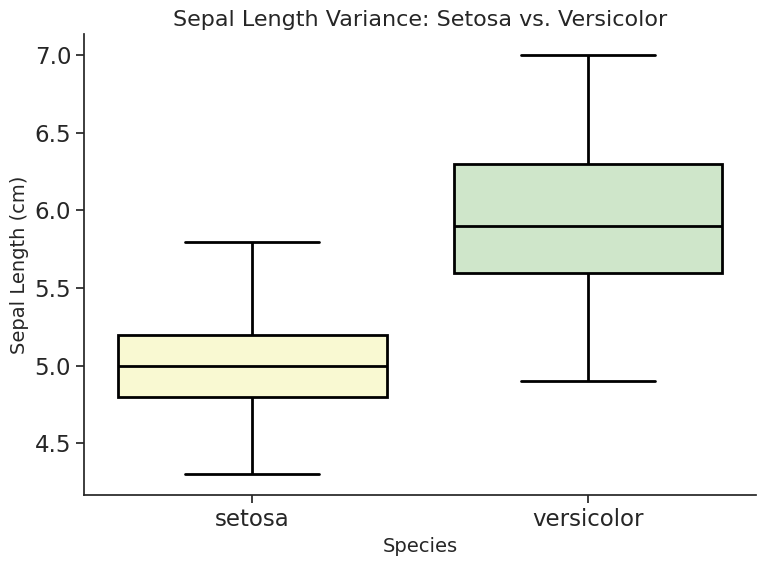

In [ ]:
from scipy.stats import f_oneway

# Set Seaborn theme, style, and palette
sns.set_theme(style="ticks", palette="Pastel1_r")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Extract sepal length data for two species
setosa_sepal_length = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_sepal_length = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']

# Perform F-Test (ANOVA for two groups)
stat, p_value = f_oneway(setosa_sepal_length, versicolor_sepal_length)

# Output results
print("F-Test for Equality of Variances:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. Variances differ significantly between the two groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in variances between the two groups.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df[iris_df['species'].isin(['setosa', 'versicolor'])],
            x='species', y='sepal length (cm)', hue='species', palette="Pastel1_r", linewidth=2, linecolor='k')
plt.title("Sepal Length Variance: Setosa vs. Versicolor", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Sepal Length (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


### Comparing Variance vs Comparing Means

In the earlier tests, we focused on comparing **means** (e.g., "Is the average petal width of `setosa` equal to that of `versicolor`?"). Now, we are shifting our focus to comparing **variances**, which quantify the **spread or dispersion** of data within each group.

---

### **Means vs. Variances: The Difference**

| **Aspect**         | **Comparing Means**                     | **Comparing Variances**                  |
|---------------------|------------------------------------------|------------------------------------------|
| **What It Tests**   | Whether the group averages are equal.   | Whether the spread of the data is equal. |
| **Purpose**         | Assesses central tendency differences.  | Assesses consistency or variability.     |
| **Examples**        | Average height, weight, or scores.      | Range of heights, variability in scores. |
| **Common Tests**    | t-tests, ANOVA.                        | Levene’s Test, F-Test.                   |

---

### **Comparing Variances: The Current Question**
For the question:  
**"Do the variances of petal width differ significantly between `setosa`, `versicolor`, and `virginica`?"**,  
we are asking whether the **spread or variability** of petal width is consistent across the three species or if one group has significantly more or less variability.

---

### **Why This Matters**
1. **Equality of Variances Assumption**:
   - Many tests (e.g., ANOVA, t-tests) assume that variances are equal between groups.
   - Testing for equal variances helps determine whether you can proceed with these tests or need alternative methods (e.g., Welch’s ANOVA).

2. **Insight Into Data**:
   - Variability can reveal group-specific characteristics. For example, higher variance might indicate that a species has a wider range of petal widths.

3. **Robustness of Analysis**:
   - If variances are unequal, ignoring this can lead to incorrect conclusions.



### **Understanding "Variances Between Groups"**

In the context of statistical testing (e.g., Levene’s Test or F-Test), **"variances between groups"** refers to the degree of variability or spread in the data within each of the groups being compared. These tests assess whether the variances of two or more groups are **equal** or **significantly different**.

---

### **What is Variance?**
- Variance is a measure of how spread out the data is around its mean. It’s calculated as:
  \[
  \text{Variance} = \frac{\sum (x_i - \bar{x})^2}{n - 1}
  \]
  Where:
  - \(x_i\): Each individual data point.
  - \(\bar{x}\): The group mean.
  - \(n\): Number of observations.

- Variance quantifies how much the data points deviate from the mean, providing insight into the **consistency** or **spread** of the data.

---

### **Variances Within Groups**
- **Within-Group Variance**: Variability of data points **inside a single group** around the group’s mean.
  - Example: In an experiment comparing two fertilizers, within-group variance measures how much plant heights vary for plants receiving the same fertilizer.

---

### **Variances Between Groups**
When comparing groups, the variances of each group are assessed to see if they are equal or significantly different. This is critical because:
1. **Equal Variances (Homogeneity)**:
   - Many tests, such as ANOVA and t-tests, assume that variances between groups are equal.
   - Example: The spread of test scores in two classes should be similar for an ANOVA to work effectively.

2. **Unequal Variances**:
   - When variances differ significantly, it can affect the validity of tests like t-tests or ANOVA.
   - In such cases, alternatives like **Welch’s t-test** (for unequal variances) or non-parametric methods may be more appropriate.

---

### **Levene's Test vs. F-Test**
1. **Levene's Test**:
   - Compares the variances of two or more groups.
   - Robust to non-normal distributions, making it suitable for real-world data that may have outliers or skewness.

2. **F-Test**:
   - Specifically tests for variance equality between two groups.
   - Assumes the data in both groups follows a normal distribution.
   - Sensitive to outliers and deviations from normality.

---

### **Why Variance Testing Matters**
Testing for equality of variances is crucial because many parametric tests, like ANOVA and t-tests, assume equal variances. If this assumption is violated:
- It may increase the chance of a **Type I error** (falsely rejecting the null hypothesis).
- It may reduce the power of the test, leading to a **Type II error** (failing to detect a true difference).

---

### **Illustrative Example**
- Suppose you’re comparing the effectiveness of two treatments (A and B) on weight loss:
  - Group A Variance: 1.5 (low spread—participants lost similar amounts of weight).
  - Group B Variance: 10.0 (high spread—some participants lost a lot, while others lost little).
  - If the variances are significantly different, it suggests the treatments might work differently for individuals, which is important to consider in your analysis.

---

### **Key Takeaway**
"Variances between groups" refers to the spread of data in each group. Testing for equality of variances ensures the validity of many statistical tests. If variances are unequal, adjustments or alternative methods are required to handle the data appropriately.



### **Question**  
Do the variances of `petal width` differ significantly between `setosa`, `versicolor`, and `virginica`?

---

### **Levene's Test for Equality of Variances**  
- **Null Hypothesis (\(H_0\))**: The variances of `petal width` are equal across `setosa`, `versicolor`, and `virginica`.  
- **Alternative Hypothesis (\(H_1\))**: At least one group's variance is different from the others.  

---

### **Analysis and Interpretation**  
- The boxplot illustrates the variability in `petal width` across the three species, with noticeable differences in the spread for each group.  
- The test statistic (\(19.89\)) indicates a significant deviation in variances between groups.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that the variances of `petal width` differ significantly between `setosa`, `versicolor`, and `virginica`.  


Levene's Test for Equality of Variances:
Test Statistic: 19.89
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Variances differ significantly between groups.




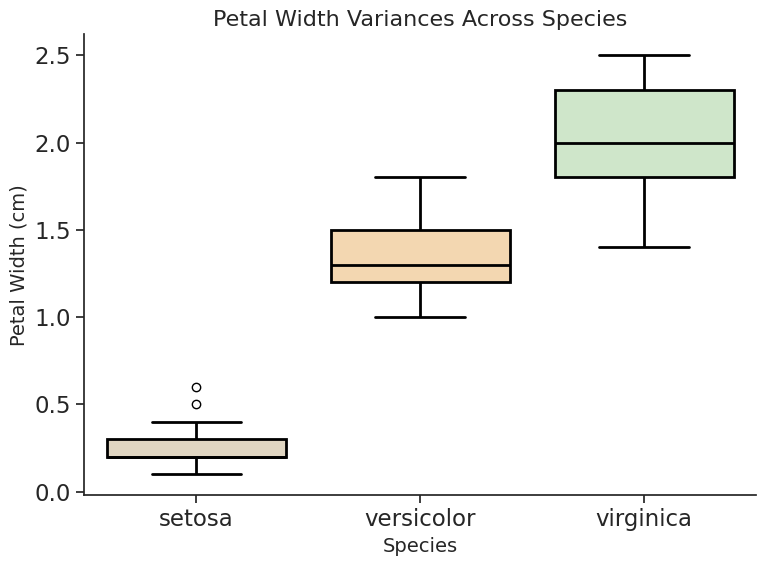

In [ ]:
from scipy.stats import levene

# Extract petal width data for each species
setosa_petal_width = iris_df[iris_df['species'] == 'setosa']['petal width (cm)']
versicolor_petal_width = iris_df[iris_df['species'] == 'versicolor']['petal width (cm)']
virginica_petal_width = iris_df[iris_df['species'] == 'virginica']['petal width (cm)']

# Perform Levene's Test
stat, p_value = levene(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

# Output results
print("Levene's Test for Equality of Variances:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. Variances differ significantly between groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in variances between groups.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df, x='species', y='petal width (cm)', hue='species', palette="Pastel1_r", linewidth=2, linecolor='k')
plt.title("Petal Width Variances Across Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Petal Width (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


### **Question**  
Do the variances of `petal length` differ significantly between `versicolor` and `virginica`?

---

### **F-Test for Equality of Variances**  
- **Null Hypothesis (\(H_0\))**: The variances of `petal length` for `versicolor` and `virginica` are equal.  
- **Alternative Hypothesis (\(H_1\))**: The variances of `petal length` for `versicolor` and `virginica` are not equal.  

---

### **Analysis and Interpretation**  
- The boxplot shows the variability in `petal length` for `versicolor` and `virginica`, with visible differences in the spread of values between the two groups.  
- The test statistic (\(158.86\)) indicates a significant deviation in variances between the two groups.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that the variances of `petal length` for `versicolor` and `virginica` are significantly different.  


F-Test for Equality of Variances:
Test Statistic: 158.86
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Variances differ significantly between the two groups.




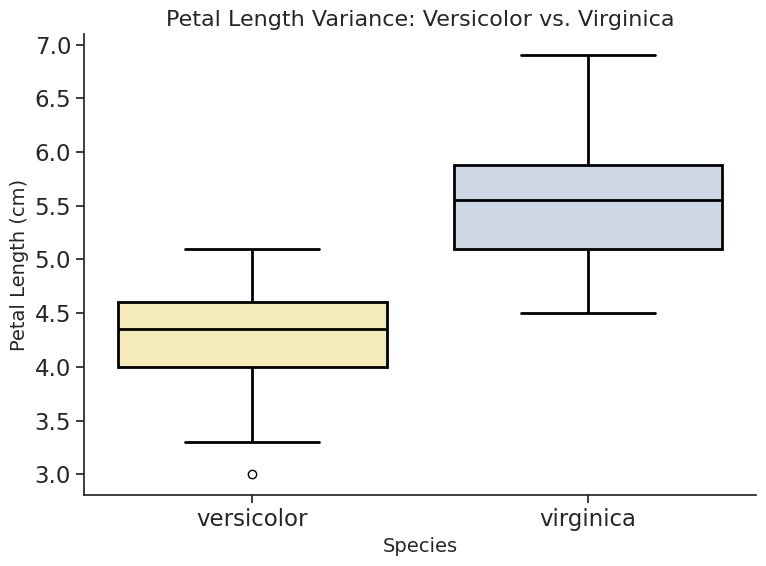

In [ ]:
from scipy.stats import f_oneway

# Extract petal length data for the two species
versicolor_petal_length = iris_df[iris_df['species'] == 'versicolor']['petal length (cm)']
virginica_petal_length = iris_df[iris_df['species'] == 'virginica']['petal length (cm)']

# Perform F-Test (ANOVA for two groups)
stat, p_value = f_oneway(versicolor_petal_length, virginica_petal_length)

# Output results
print("F-Test for Equality of Variances:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. Variances differ significantly between the two groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in variances between the two groups.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df[iris_df['species'].isin(['versicolor', 'virginica'])],
            x='species', y='petal length (cm)', hue='species', palette="Pastel2_r", linewidth=2, linecolor='k')
plt.title("Petal Length Variance: Versicolor vs. Virginica", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Petal Length (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


### **Summary: When to Use Levene’s Test vs. F-Test**

#### **Levene’s Test**
- **Purpose**: To test whether the variances of two or more groups are equal.
- **When to Use**:
  - Comparing **three or more groups** (e.g., variance of `sepal length` for `setosa`, `versicolor`, and `virginica`).
  - **Data is not strictly normal**: Levene’s Test is more robust to deviations from normality and handles outliers better than the F-Test.
  - As a **precursor to ANOVA**: Ensures that the assumption of equal variances is satisfied before performing ANOVA.

#### **F-Test**
- **Purpose**: To test whether the variances of **two groups** are equal.
- **When to Use**:
  - Comparing **exactly two groups** (e.g., variance of `petal length` for `versicolor` and `virginica`).
  - Data is **normally distributed**: The F-Test assumes that both groups follow a normal distribution.
  - As a **precursor to a two-sample t-test**: Ensures that the equal variance assumption is met before using a t-test.

---

#### **Key Differences**
| Feature               | Levene’s Test                           | F-Test                                   |
|-----------------------|-----------------------------------------|-----------------------------------------|
| **Number of Groups**  | Two or more                             | Exactly two                             |
| **Assumptions**       | Robust to non-normality and outliers    | Assumes normal distribution             |
| **Robustness**        | Handles real-world data better          | Sensitive to outliers and deviations    |
| **Common Use Cases**  | Precursor to ANOVA                      | Precursor to two-sample t-test          |

---

### **Key Takeaways**
1. **Use Levene’s Test** for multiple groups, non-normal data, or when robustness is important.  
2. **Use the F-Test** when comparing exactly two groups and the data meets normality assumptions.  




### **Transformations in Levene’s Test**

Levene’s Test transforms the data to make it more robust to deviations from normality by focusing on the **absolute deviations** from the group means or medians rather than the raw data itself.

#### **How It Works**
1. **Compute Deviations**:
   - For each data point, calculate its deviation from the group mean or median (depending on the chosen method).

2. **Transform Data**:
   - These absolute deviations replace the original data values, reducing the influence of extreme values or outliers.

3. **Perform ANOVA**:
   - An ANOVA is conducted on the transformed deviations to test whether the group variances (mean of the deviations) are equal.

---

### **Why the Transformation Helps**
1. **Focus on Variances**:
   - By transforming to absolute deviations, Levene’s Test isolates differences in variability between groups without being influenced by the raw data’s distribution.

2. **Handles Non-Normality**:
   - Non-normal data often has skewed distributions or outliers. Absolute deviations minimize the impact of these features, making the test robust to departures from normality.

3. **Reduces Sensitivity to Outliers**:
   - Outliers can heavily influence means and variances in the raw data, especially for parametric tests like the F-Test. The transformation reduces this influence.

---

### **Comparison to the F-Test**
| Feature                  | **Levene’s Test**                          | **F-Test**                              |
|--------------------------|--------------------------------------------|-----------------------------------------|
| **Data Transformation**  | Uses absolute deviations from group means or medians | No transformation, works on raw data   |
| **Robustness**           | Robust to outliers and non-normal data     | Sensitive to outliers and non-normality |
| **Preferred for**        | Non-parametric or real-world data          | Strictly normal and clean data          |

---

### **Key Takeaway**
The transformation in Levene’s Test makes it more suitable for non-parametric data because it mitigates the impact of outliers and deviations from normality. The F-Test lacks this robustness, as it directly uses raw variances, which are heavily influenced by extreme values or non-normal distributions.


Testing for variances is typically **not an end in itself** but rather a **precursor** to guide which type of means testing to perform or whether additional adjustments are necessary for your analysis. Here’s why:

---

### **Why Test for Variances?**
1. **Check Assumptions for Parametric Tests**:
   - Many parametric tests (e.g., t-tests, ANOVA) assume **homogeneity of variances** (equal variances between groups).  
   - If variances are significantly different, those tests may yield invalid results, such as:
     - Increased **Type I errors** (falsely rejecting the null hypothesis).
     - Decreased **power** (missing a true difference).

2. **Guide Test Selection**:
   - **Equal Variances**:
     - You can proceed with traditional parametric tests like ANOVA or the pooled two-sample t-test.
   - **Unequal Variances**:
     - Use robust alternatives, such as:
       - **Welch’s t-test**: Accounts for unequal variances in two-sample comparisons.
       - **Welch’s ANOVA**: An alternative to standard ANOVA.
       - Non-parametric tests (e.g., Mann-Whitney U or Kruskal-Wallis).

3. **Understand Variability**:
   - Even when variance testing isn’t strictly required, it can provide insights into the data’s structure and variability.
   - Example:
     - A group with very high variance might indicate subgroups or outliers that deserve closer examination.

---

### **When Is Variance Testing Critical?**
1. **Small Sample Sizes**:
   - When sample sizes are small, differences in variance can greatly impact the validity of parametric tests.

2. **Highly Unequal Variances**:
   - If one group has much higher variability than others, it can skew test results.

3. **Exploratory Analysis**:
   - Variance testing is useful during exploratory data analysis to understand data characteristics before performing hypothesis testing.

---

### **Key Takeaway**
- Variance testing is **a diagnostic step** to ensure the assumptions of your main hypothesis test are met.
- It determines:
  - Whether you can use parametric tests with confidence.
  - If adjustments (e.g., Welch’s methods) or alternative tests are necessary.
